In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm

from energy_consumption.feature_selection.extract import extract_energy_data, extract_all_features
from energy_consumption.help_functions import get_forecast_timestamps, create_submission_frame

In [2]:
energydata = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\feature_selection\\data\\historical_data.csv')
energydata['date_time'] = pd.to_datetime(
    energydata['date_time'], format='%Y-%m-%d %H:%M:%S')
energydata = energydata.set_index("date_time")

In [3]:
energydata_knn = extract_all_features.get_energy_and_standardized_features(energydata, knn=True)
energydata_knn

2016-12-26 00:00:00
2023-11-23 12:00:00


,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,...,year_2021,year_2022,year_2023,year_2024,holiday,sun_hours,tavg,wspd,index,energy_consumption
date_time,,,,,,,,,,,,,,,,,,,,,
2016-12-26 00:00:00,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,...,-0.411308,-0.411308,-0.384936,0.0,5.355087,-1.499845,-0.514633,1.989731,-0.780066,41.81025
2016-12-26 01:00:00,4.795377,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,...,-0.411308,-0.411308,-0.384936,0.0,5.355087,-1.499845,-0.514633,1.989731,-0.780066,39.73950
2016-12-26 02:00:00,-0.208534,4.795377,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,...,-0.411308,-0.411308,-0.384936,0.0,5.355087,-1.499845,-0.514633,1.989731,-0.780066,38.78525
2016-12-26 03:00:00,-0.208534,-0.208534,4.795377,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,...,-0.411308,-0.411308,-0.384936,0.0,5.355087,-1.499845,-0.514633,1.989731,-0.780066,38.96900
2016-12-26 04:00:00,-0.208534,-0.208534,-0.208534,4.795377,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,...,-0.411308,-0.411308,-0.384936,0.0,5.355087,-1.499845,-0.514633,1.989731,-0.780066,39.18750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 08:00:00,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,4.795377,-0.208534,-0.208534,...,-0.411308,-0.411308,2.597836,0.0,-0.186738,-1.266314,-1.520067,-0.580195,-1.968927,65.75125
2023-11-22 09:00:00,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,4.795377,-0.208534,...,-0.411308,-0.411308,2.597836,0.0,-0.186738,-1.266314,-1.520067,-0.580195,-1.968927,67.40950
2023-11-22 10:00:00,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,4.795377,...,-0.411308,-0.411308,2.597836,0.0,-0.186738,-1.266314,-1.520067,-0.580195,-1.968927,68.26775


In [4]:
y = energydata_knn[['energy_consumption']]
X = energydata_knn.drop(columns=['energy_consumption'])

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.metrics import mean_squared_error

import statistics

y = energydata[['energy_consumption']]
X = energydata.drop(columns=['energy_consumption'])

# Time Series Split
tscv = TimeSeriesSplit(n_splits=5, test_size=100)

rf = []
xgb = []
knn = []
#rnr = []


for train_index, test_index in tscv.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Random Forest Regression
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)

    # XGBoost Regression
    xgb_model = XGBRegressor()
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)

    # KNNRegression
    knn_model = KNeighborsRegressor(n_neighbors=11, weights='uniform')
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)

    # Radius Neigbors
    # rnr_model = RadiusNeighborsRegressor(weights='distance')
    # rnr_model.fit(X_train, y_train)
    # rnr_predictions = rnr_model.predict(X_test)

    # Evaluate the models
    rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
    rf.append(rf_rmse)

    xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
    xgb.append(xgb_rmse)

    knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)
    knn.append(knn_rmse)

rmse_means = {'RandomForestRegressor MSPE': statistics.mean(rf),
              'XGBoost MSPE': statistics.mean(xgb),
              'KNeighborsRegressor MSPE': statistics.mean(knn)}
rmse_means

Idea: 
Time Series Split in general good, but better to have smaller test sets (100), since no predictions above this horizon are to be done
--> Do customized cross-validation to derive optimal k

In [27]:
y.var()

energy_consumption    98.971323
dtype: float64

In [106]:
k_range = list(range(2,31))

# Perform time series split
tscv = TimeSeriesSplit(n_splits=50, test_size=100)
indexes = list(range(100))

residuals = pd.DataFrame()
distances = pd.DataFrame()
for i in indexes:
    residuals[f'{i}'] = np.nan
    distances[f'{i}'] = np.nan

mspes = {}
vars = {}

for k in k_range: 

    print('start of round -------', k, '-----------')

    # Create a KNeighborsRegressor instance
    knn_model = KNeighborsRegressor(n_neighbors=k, weights='distance')
    curr_mspes =[]

    for train_index, test_index in tscv.split(X):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        knn_model.fit(X_train, y_train)
        knn_predictions = knn_model.predict(X_test).flatten()
        mspe = mean_squared_error(y_test, knn_predictions)
        curr_mspes.append(mspe)

    mspes.update({k: np.mean(curr_mspes)})
    vars.update({k: np.var(curr_mspes)})

start of round ------- 2 -----------
start of round ------- 3 -----------
start of round ------- 4 -----------


In [105]:
knn_predictions-y_test

array([ 13.17566805,   8.72292929,   4.90472316,   0.99340259,
        -2.01853007,  -4.71803677,  -6.51495907,  -4.93171785,
        -1.52413172,  -0.29290092,  -1.03766631,  -3.4290935 ,
        -5.84071382,  -7.74348741,  -9.57006846, -10.8248168 ,
       -11.40760889,  -8.98413331,  -4.99591482,  -1.32404747,
         1.79793476,   6.3775337 ,   9.74032016,  11.79611539,
        10.81807746,   6.40634606,   3.23688745,  -0.27567289,
        -3.34034987,  -6.51359055,  -8.38394121,  -7.17200551,
        -3.24144975,  -1.98427014,  -1.85348348,  -3.53387795,
        -5.69964357,  -7.52192965,  -9.27727302, -10.31575936,
       -10.75520808,  -8.09087846,  -4.20714243,  -0.58101011,
         4.02157555,  11.92839259,  16.42468177,  18.49274126,
        16.80627816,  11.85506228,   7.81723084,   4.54859288,
         1.6248161 ,  -1.0410907 ,  -2.60573856,  -2.05381913,
         1.69421734,   2.80902192,   2.29966217,  -0.1450493 ,
        -3.06049113,  -5.01155759,  -6.7657363 ,  -7.78

In [94]:
mspes

{2: 12.041197681149521,
 3: 10.418831233063276,
 4: 9.411684498193203,
 5: 9.23037081891639,
 6: 9.31584441408017,
 7: 9.258334609170884,
 8: 9.726048861843134,
 9: 9.921258579996158,
 10: 10.197915004985015,
 11: 10.616799447233902,
 12: 10.778695814717121,
 13: 10.804354714461544,
 14: 10.949054893382733,
 15: 11.091453494487205,
 16: 11.300758345235922,
 17: 11.465863253018451,
 18: 11.689900528103747,
 19: 11.771839750308745,
 20: 11.898800095519887,
 21: 11.998240855630307,
 22: 12.14868834968295,
 23: 12.20474462636327,
 24: 12.364151823893012,
 25: 12.46012629680775,
 26: 12.504206078728522,
 27: 12.499580845165156,
 28: 12.541550287352143,
 29: 12.493220131465844,
 30: 12.391693147419867}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


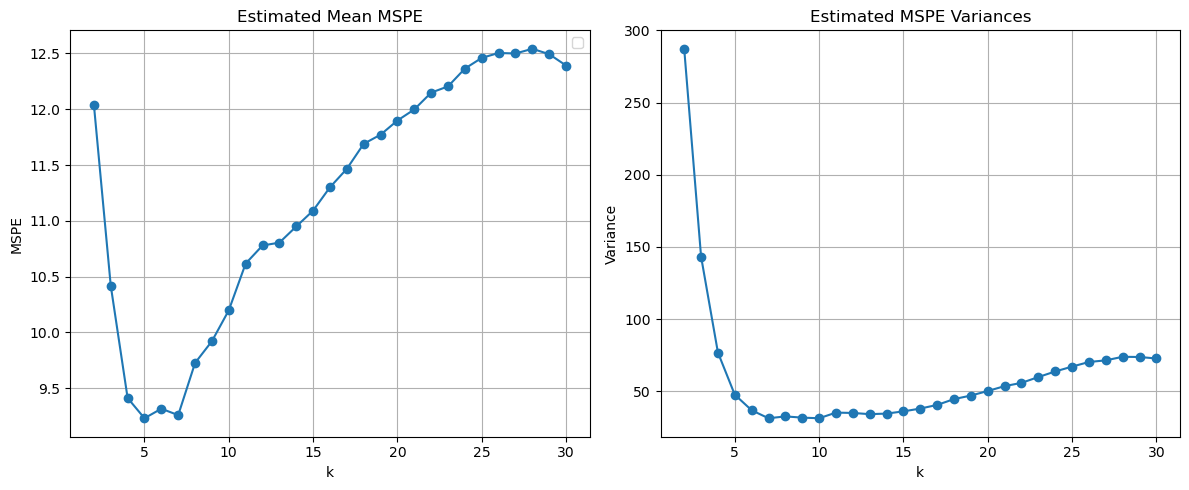

In [95]:
import matplotlib.pyplot as plt

# Extract keys and values from the dictionary
k_values = list(mspes.keys())
mspe_values = list(mspes.values())
var_values = list(vars.values())

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph on ax1
ax1.plot(k_values, mspe_values, marker='o', linestyle='-')
ax1.set_title('Estimated Mean MSPE')
ax1.set_xlabel('k')
ax1.set_ylabel('MSPE')
ax1.grid(True)
ax1.legend(loc='upper right')

# Plot the second graph on ax2 (assuming you have variances defined)
var_values = list(vars.values())
ax2.plot(k_values, var_values, marker='o', linestyle='-')
ax2.set_title('Estimated MSPE Variances')
ax2.set_xlabel('k')
ax2.set_ylabel('Variance')
ax2.grid(True)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()

Nehme k=7

In [118]:
# Perform time series split
tscv = TimeSeriesSplit(n_splits=200, test_size=100)
indexes = list(range(100))

residuals = pd.DataFrame()
distances = pd.DataFrame()
for i in indexes:
    residuals[f'{i}'] = np.nan
    distances[f'{i}'] = np.nan

for train_index, test_index in tscv.split(X):

    print(f'start of iteration {i}')

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_test = np.array(y_test['energy_consumption'])

    # Create a KNeighborsRegressor instance
    knn_model = KNeighborsRegressor(
        n_neighbors=7, weights='distance')  # adjust
    knn_model.fit(X_train, y_train)

    # estimate forecast means
    mean_est = knn_model.predict(X_test).flatten()

    # residuals based on horizon
    residuals_est = y_test-mean_est

    # safe
    residuals.loc[len(residuals)] = residuals_est

    neigh_dist, neigh_ind = knn_model.kneighbors(X_test, 7)
    distances.loc[len(distances)] = np.mean(neigh_dist, axis=1)

residuals
distances

start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of iteration 99
start of i

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.189277,3.189277,3.189277,3.189277,3.189277,3.189277,3.189277,3.189277,3.189277,3.189277,...,3.283366,2.901276,2.901276,2.901276,2.901276,2.901276,2.904859,2.904859,2.904859,2.904859
1,2.898314,2.898314,2.898314,2.898314,2.898314,2.898314,2.898314,2.898314,2.898314,2.898314,...,2.955805,2.955805,2.955805,2.955805,2.955805,2.955805,2.955805,2.955805,2.955805,2.955805
2,2.814662,2.814662,2.814662,2.814662,2.814662,2.814662,2.814662,2.814662,2.814662,2.814662,...,2.031348,2.031348,2.031348,2.031348,2.031348,2.031348,2.031362,2.031362,2.031362,2.031362
3,2.020386,2.020386,2.020386,2.020386,2.020386,2.020386,2.020386,2.312531,2.312531,2.312531,...,2.161844,2.161844,2.161844,2.161844,2.161844,2.161844,2.325083,2.325083,2.325083,2.325083
4,2.161844,2.161844,2.161844,2.186153,2.186153,2.186153,2.186153,2.186153,2.186153,2.186153,...,1.814039,1.814039,1.814039,1.814039,1.814039,1.814039,1.814039,1.814039,1.814039,4.124080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4.328461,4.328461,4.328461,4.328461,4.328461,4.328461,4.328461,4.234096,4.234096,4.234096,...,4.467276,4.467276,4.467276,4.467276,4.467276,4.467276,4.536491,4.536491,4.536491,4.536491
196,4.220225,4.220225,4.220225,3.276615,3.276615,3.276615,3.276615,3.276615,3.276615,3.276615,...,3.514480,3.514480,3.514480,3.514480,3.514480,3.514480,3.540074,3.540074,3.540074,3.494182
197,3.323562,3.323562,3.323562,3.323562,3.323562,3.323562,3.323562,3.323562,3.323562,3.323562,...,2.804356,2.804356,2.804356,2.804356,2.804356,3.730955,3.730955,3.730955,3.730955,3.730955
198,3.666147,3.666147,3.666147,3.666147,3.666147,3.666147,3.666147,3.666147,3.666147,3.666147,...,2.986221,3.046330,3.046330,3.046330,3.046330,3.046330,3.046330,3.046330,3.046330,3.046330


In [115]:
row_means = np.mean(neigh_dist, axis=1)
row_means

array([3.60427189, 3.60427189, 3.60427189, 3.60427189, 3.60427189,
       3.60427189, 3.60427189, 3.60427189, 3.60427189, 3.60427189,
       3.60427189, 3.60427189, 3.60427189, 3.60427189, 3.60427189,
       3.60427189, 3.60427189, 3.60427189, 3.60427189, 3.64436182,
       3.64436182, 3.64436182, 3.64436182, 3.64436182, 3.64902608,
       3.64902608, 3.64902608, 3.64902608, 3.64902608, 3.64902608,
       3.64902608, 3.64902608, 3.64902608, 3.64902608, 3.64902608,
       3.64902608, 3.64902608, 3.64902608, 3.64902608, 3.64902608,
       3.64902608, 3.64902608, 3.64902608, 3.65531961, 3.65531961,
       3.65531961, 3.65531961, 3.65531961, 3.65861832, 3.65861832,
       3.65861832, 3.65861832, 3.65861832, 3.65861832, 3.65861832,
       3.65861832, 3.65861832, 3.65861832, 3.65861832, 3.65861832,
       3.65861832, 3.65861832, 3.65861832, 3.65861832, 3.65861832,
       3.65861832, 3.65861832, 3.66983609, 3.66983609, 3.66983609,
       3.66983609, 3.66983609, 3.67677531, 3.67677531, 3.67677

In [ ]:
# Perform time series split
tscv = TimeSeriesSplit(n_splits=200, test_size=100)
indexes = list(range(101))
residuals = pd.DataFrame()
for i in indexes:
    residuals[f'{i}'] = np.nan

for train_index, test_index in tscv.split(X):

    # fit KNNRegression with best k
    knn_model = KNeighborsRegressor(
        n_neighbors=13, weights='distance') 

    # make sure we have enough data to train (models stay comparable)
    if test_index[0] >= 27014:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        knn_model.fit(X_train, y_train)

        # estimate forecast means
        mean_est = knn_model.predict(X_test)[indexes]

        # residuals based on horizon
        y_obs = np.array(y_test).flatten()
        residuals_est = mean_est-y_obs

        # safe
        residuals.loc[len(residuals)] = residuals_est

        neigh_dist, neigh_ind = knn_model.kneighbors(X_test, 13)
        distances.loc[[len(distances)]] = np.mean(neigh_dist)

In [132]:
list_names = []
for i in indexes: 
    name = f'index_{i}'
    list_names.append(name)
residuals.rename(columns=dict(
    zip(residuals.columns,list_names)), inplace=True)

distances_means = np.mean(distances, axis=0)
simulated_distances = pd.DataFrame({'index': indexes, 'mean_distance': distances_means})

# export residuals to avoid additional computational effort
residuals.to_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\residuals.csv', index=False)


# export distances to avoid additional computational effort
simulated_distances.to_csv(
     'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\distances.csv', index=False)

In [5]:
# import residuals to avoid additional computational effort
simulated_residuals = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\residuals.csv')
# import distances to avoid additional computational effort
simulated_distances = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\distances.csv')

In [130]:
residuals_means = simulated_residuals.mean()
residuals_variances = simulated_residuals.var()
residuals_variances
df_descriptive = pd.DataFrame({'mean': residuals_means,
                               'variance': residuals_variances})
df_descriptive # zeigt: trend nach unten

,mean,variance
0,-0.370928,10.048979
1,-0.371168,10.386556
2,-0.437063,10.653119
3,-0.285637,9.833850
4,-0.313846,9.342214
...,...,...
95,-0.615485,10.237780
96,-0.688581,10.232562
97,-0.686431,11.029806
98,-0.672466,11.311713


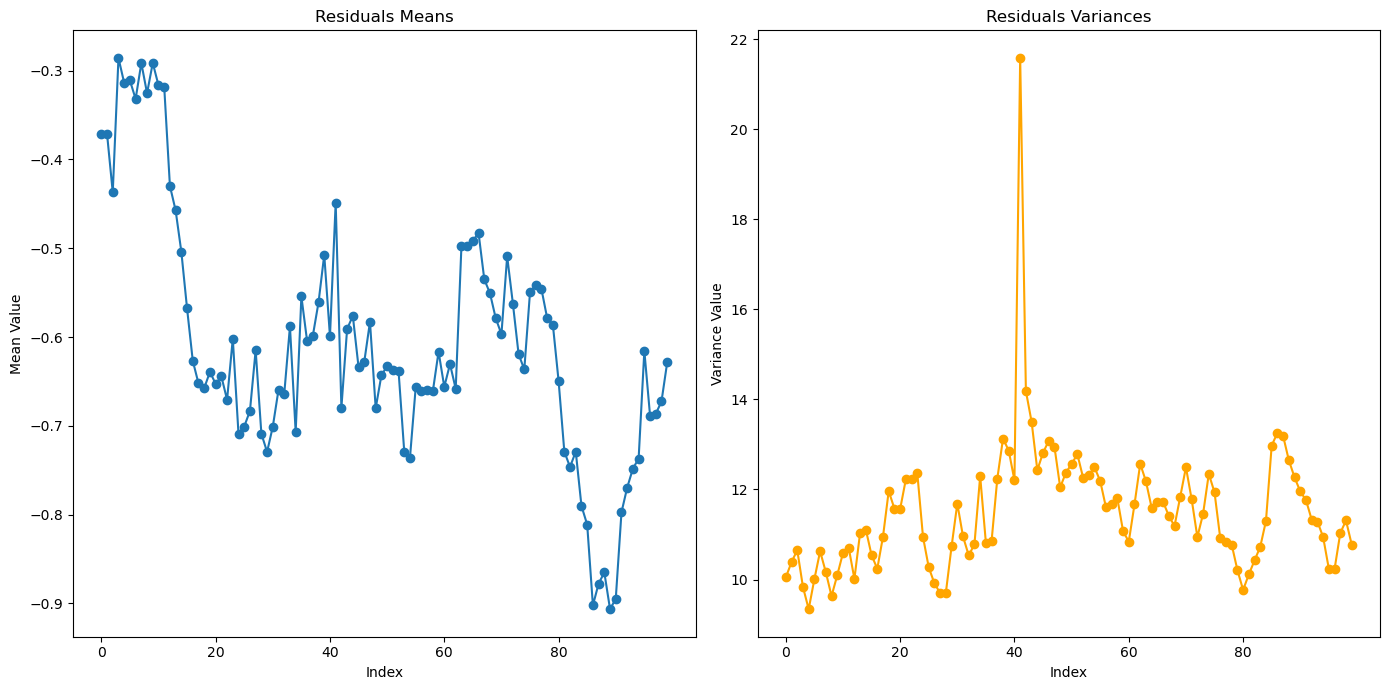

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a data frame from the calculated means and variances
characteristics_df = pd.DataFrame(
    {'Means': residuals_means, 'Variances': residuals_variances})

# Plotting
plt.figure(figsize=(14, 7))  # Adjusted the figure size for better visibility

# Plot Means
plt.subplot(1, 2, 1)
# Use plt.plot() for lines
plt.plot(characteristics_df.index, characteristics_df['Means'], marker='o')
plt.title('Residuals Means')
plt.xlabel('Index')
plt.ylabel('Mean Value')
# Set x-axis ticks with a step of 10
plt.xticks(characteristics_df.index[::(len(characteristics_df) // 5)])

# Plot Variances
plt.subplot(1, 2, 2)
# Use plt.plot() for lines
plt.plot(characteristics_df.index,
         characteristics_df['Variances'], color='orange', marker='o')
plt.title('Residuals Variances')
plt.xlabel('Index')
plt.ylabel('Variance Value')
plt.xticks(characteristics_df.index[::(len(characteristics_df) // 5)])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Residuenanalyse zeigt: Tendenz, negativ abzuweichen --> korrigiere Schätzung um Residuals mean

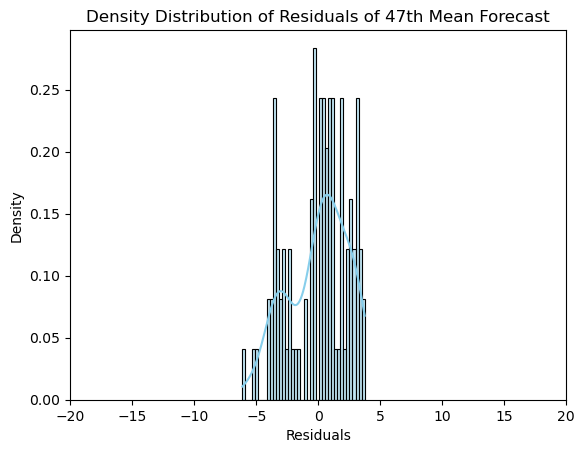

In [136]:
import seaborn as sns

array_47 = np.array(residuals.iloc[47]-np.mean(residuals.iloc[47]))

# Create a density plot using seaborn
sns.histplot(array_47, kde=True, stat="density", color="skyblue", bins=40)

# Add labels and title
plt.xlabel('Residuals')
plt.xlim(-20,20)
plt.ylabel('Density')
plt.title('Density Distribution of Residuals of 47th Mean Forecast')

# Show the plot
plt.show()

Interpretation: keine Normalverteilungsannahme möglich --> Berechne Quantile mit empirischer Verteilung der Residuen
Daher auch keine std_to add --> bereits mit drinnen (?)

Fragen: 
* wenn mit empirischer Verteilung der Quantile: muss ich Quantil der NV mitreinbringen? Zusätzliches Rauschen integrieren?

In [6]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

from energy_consumption.feature_selection.extract import extract_energy_data, extract_all_features
from energy_consumption.help_functions.drop_years import drop_years
from energy_consumption.help_functions import get_forecast_timestamps, create_submission_frame

In [7]:
energydata = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\feature_selection\\data\\historical_data.csv')
energydata['date_time'] = pd.to_datetime(
    energydata['date_time'], format='%Y-%m-%d %H:%M:%S')
energydata = energydata.set_index("date_time")
energydata

,energy_consumption
date_time,
2016-12-26 00:00:00,41.81025
2016-12-26 01:00:00,39.73950
2016-12-26 02:00:00,38.78525
2016-12-26 03:00:00,38.96900
2016-12-26 04:00:00,39.18750
...,...
2023-11-22 08:00:00,65.75125
2023-11-22 09:00:00,67.40950
2023-11-22 10:00:00,68.26775


In [8]:
residuals = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\residuals.csv')
distances = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\distances.csv')

def get_quantiles(mean_est, neighbor_distances, indexes, quantiles):

    column_names = [f'q{q}' for q in quantiles]
    quantile_df = pd.DataFrame(columns=column_names)
    quantiles = list(100*np.array(quantiles))

    # input two np.arrays
    for i in indexes:

        # weighten percentiles by distance ration
        mean_distance = np.mean(neighbor_distances[i])
        distance_ratio = mean_distance/distances.iloc[i, 1]

        # estimate quantile
        name = f'index_{i}'
        print(np.array(mean_est[i] + distance_ratio *
              np.percentile(residuals[name], quantiles)))
        quantile_df.loc[i] = np.array(
            mean_est[i] + distance_ratio*np.percentile(residuals[name], quantiles))

    return quantile_df

In [17]:
def get_KNNRegression_forecasts(energydata=np.nan, indexes=[47, 51, 55, 71, 75, 79], quantiles=[0.025, 0.25, 0.5, 0.75, 0.975], periods=100, abs_eval = False):

    if type(energydata) == float:
        # use derived optimum for number of years
        energydata = extract_energy_data.get_data(num_years=0.25) # change to 7

    energydata = extract_all_features.get_energy_and_standardized_features(
        energydata, knn=True)

    X = energydata.drop(columns=['energy_consumption'])
    y = energydata['energy_consumption']

    # create dataframe to store forecast quantiles
    energyforecast = get_forecast_timestamps.forecast_timestamps(
        energydata.index[-1])

    X_pred = extract_all_features.get_energy_and_standardized_features(
        energyforecast, knn=True)

    X, X_pred = drop_years(X, X_pred)

    # fit KNNRegression with best k
    knn_model = KNeighborsRegressor(n_neighbors=7, weights='distance')

    # Fit the model on the scaled data
    knn_model.fit(X, y)

    # estimate forecast mean
    mean_est = knn_model.predict(X_pred)
    neighbor_distances, neighbor_indizes = knn_model.kneighbors(X_pred, 7)

    # estimate quantile forecasts
    quantile_forecasts = get_quantiles(
        mean_est, neighbor_distances, indexes, quantiles)

    # return quantile forecasts in terms of absolute evaluation
    if abs_eval == True:
        horizon = pd.date_range(start=energydata.index[-1] + pd.DateOffset(
            hours=1), periods=periods, freq='H')
        quantile_forecasts.insert(
            0, 'date_time', [horizon[i] for i in indexes])

        return quantile_forecasts

    # else: create submission frame
    else:
        forecast_frame = create_submission_frame.get_frame(
            quantile_forecasts, indexes)
        forecast_frame = forecast_frame.drop(columns={'index'})
        horizon = pd.date_range(start=energydata.index[-1] + pd.DateOffset(
            hours=1), periods=periods, freq='H')
        forecast_frame.insert(
            0, 'date_time', [horizon[i] for i in indexes])

        return forecast_frame

In [18]:
get_KNNRegression_forecasts(indexes = list(range(20)), quantiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], abs_eval = True)


100%|██████████| 13/13 [00:08<00:00,  1.50it/s]


2023-10-30 00:00:00
2024-01-18 12:00:00
2024-01-17 13:00:00
2024-01-22 16:00:00
[61.95878257 63.4454296  64.35327158 65.23734441 65.8261345  66.43414074
 67.18139912 68.00603472 69.27100043]
[60.83885332 62.15172958 63.0742619  63.94439719 64.58011899 65.28795075
 66.20460652 66.82372174 67.51826149]
[60.2680431  61.728017   62.87368669 63.56865141 64.39082154 65.03127575
 65.76707205 66.45939754 67.30486878]
[61.36859815 62.88370629 63.85398964 64.7770901  65.5678311  66.07547606
 66.67362297 67.16614077 68.24920535]
[63.14069812 64.55358663 65.5116689  66.23146139 66.8477527  67.57966808
 68.012026   68.6750427  69.83008992]
[62.41977486 63.96757551 65.13303748 65.96367518 66.53192811 67.21761238
 67.8373483  68.42213371 69.28875493]
[60.50052768 62.34077709 63.69104983 64.36463483 64.9836955  65.62181886
 66.25801842 66.69210468 67.87991457]
[57.27849678 58.98542506 60.15878503 61.05751134 61.63866346 62.12992772
 62.96064497 63.42092009 64.44366755]
[53.97384638 55.648843   56.9360

,date_time,q0.1,q0.2,q0.3,q0.4,q0.5,q0.6,q0.7,q0.8,q0.9
0,2024-01-17 13:00:00,61.958783,63.445430,64.353272,65.237344,65.826134,66.434141,67.181399,68.006035,69.271000
1,2024-01-17 14:00:00,60.838853,62.151730,63.074262,63.944397,64.580119,65.287951,66.204607,66.823722,67.518261
2,2024-01-17 15:00:00,60.268043,61.728017,62.873687,63.568651,64.390822,65.031276,65.767072,66.459398,67.304869
3,2024-01-17 16:00:00,61.368598,62.883706,63.853990,64.777090,65.567831,66.075476,66.673623,67.166141,68.249205
4,2024-01-17 17:00:00,63.140698,64.553587,65.511669,66.231461,66.847753,67.579668,68.012026,68.675043,69.830090
5,2024-01-17 18:00:00,62.419775,63.967576,65.133037,65.963675,66.531928,67.217612,67.837348,68.422134,69.288755
6,2024-01-17 19:00:00,60.500528,62.340777,63.691050,64.364635,64.983695,65.621819,66.258018,66.692105,67.879915
7,2024-01-17 20:00:00,57.278497,58.985425,60.158785,61.057511,61.638663,62.129928,62.960645,63.420920,64.443668
8,2024-01-17 21:00:00,53.973846,55.648843,56.936027,57.845364,58.427464,59.128216,59.564180,60.211055,61.159704
9,2024-01-17 22:00:00,51.237916,52.953223,54.252696,55.210266,55.742215,56.316895,56.832553,57.455887,58.651706
